In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def scrape_NBA_per_poss_data(years):
    final_df = pd.DataFrame()
    for y in years:
        year = y
        # URL page we will scraping
        url = "https://www.basketball-reference.com/leagues/NBA_{}_per_poss.html".format(year)
        # this is the HTML from the given URL
        html = urlopen(url)
        soup = BeautifulSoup(html)
        # use findALL() to get the column headers
        soup.findAll('tr', limit=2)
        # use getText()to extract the text we need into a list
        headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
        # exclude the first column as we will not need the ranking order from Basketball Reference for the analysis
        headers = headers[1:]
        # avoid the first header row
        rows = soup.findAll('tr')[1:]
        player_stats = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]
        stats = pd.DataFrame(player_stats, columns = headers)
        final_df = final_df.append(stats)
    print(final_df.info)
    final_df.to_csv("nba_per_poss_data.csv", index=False)

In [3]:
scrape_NBA_per_poss_data(years = [2017,2018,2019,2020,2021])

/var/folders/q1/q8gb7gbx7t9_07mq6xmp20vr0000gn/T/ipykernel_7249/3425176053.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(stats)
/var/folders/q1/q8gb7gbx7t9_07mq6xmp20vr0000gn/T/ipykernel_7249/3425176053.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(stats)
/var/folders/q1/q8gb7gbx7t9_07mq6xmp20vr0000gn/T/ipykernel_7249/3425176053.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(stats)
/var/folders/q1/q8gb7gbx7t9_07mq6xmp20vr0000gn/T/ipykernel_7249/3425176053.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(sta

<bound method DataFrame.info of              Player Pos Age   Tm   G  GS    MP    FG   FGA   FG%  ...   TRB  \
0      Álex Abrines  SG  23  OKC  68   6  1055   6.2  15.9  .393  ...   4.0   
1        Quincy Acy  PF  26  TOT  38   1   558   6.0  14.6  .412  ...   9.8   
2        Quincy Acy  PF  26  DAL   6   0    48   5.4  18.4  .294  ...   8.7   
3        Quincy Acy  PF  26  BRK  32   1   510   6.0  14.2  .425  ...   9.9   
4      Steven Adams   C  23  OKC  80  80  2389   7.7  13.5  .571  ...  12.6   
..              ...  ..  ..  ...  ..  ..   ...   ...   ...   ...  ...   ...   
726    Delon Wright  PG  28  SAC  27   8   696   7.2  15.5  .462  ...   7.2   
727  Thaddeus Young  PF  32  CHI  68  23  1652  10.9  19.4  .559  ...  12.4   
728      Trae Young  PG  22  ATL  63  63  2125  11.3  25.7  .438  ...   5.7   
729     Cody Zeller   C  28  CHO  48  21  1005   8.8  15.7  .559  ...  15.9   
730     Ivica Zubac   C  23  LAC  72  33  1609   7.9  12.1  .652  ...  16.0   

      AST  STL  BLK

/var/folders/q1/q8gb7gbx7t9_07mq6xmp20vr0000gn/T/ipykernel_7249/3425176053.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(stats)


In [4]:
def scrape_NBA_advanced_data(years):
    final_df = pd.DataFrame()
    for y in years:
        year = y
        # URL page we will scraping
        url = "https://www.basketball-reference.com/leagues/NBA_{}_advanced.html".format(year)
        # this is the HTML from the given URL
        html = urlopen(url)
        soup = BeautifulSoup(html)
        # use findALL() to get the column headers
        soup.findAll('tr', limit=2)
        # use getText()to extract the text we need into a list
        headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
        # exclude the first column as we will not need the ranking order from Basketball Reference for the analysis
        headers = headers[1:]
        # avoid the first header row
        rows = soup.findAll('tr')[1:]
        player_stats = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]
        stats = pd.DataFrame(player_stats, columns = headers)
        final_df = final_df.append(stats)
    print(final_df.info)
    final_df.to_csv("nba_advanced_data.csv", index=False)

In [5]:
scrape_NBA_advanced_data(years = [2017,2018,2019,2020,2021])

/var/folders/q1/q8gb7gbx7t9_07mq6xmp20vr0000gn/T/ipykernel_7249/1929324977.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(stats)
/var/folders/q1/q8gb7gbx7t9_07mq6xmp20vr0000gn/T/ipykernel_7249/1929324977.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(stats)
/var/folders/q1/q8gb7gbx7t9_07mq6xmp20vr0000gn/T/ipykernel_7249/1929324977.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(stats)
/var/folders/q1/q8gb7gbx7t9_07mq6xmp20vr0000gn/T/ipykernel_7249/1929324977.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(sta

<bound method DataFrame.info of              Player Pos Age   Tm   G    MP   PER   TS%  3PAr   FTr  ...     \
0      Álex Abrines  SG  23  OKC  68  1055  10.1  .560  .724  .144  ...      
1        Quincy Acy  PF  26  TOT  38   558  11.8  .565  .529  .353  ...      
2        Quincy Acy  PF  26  DAL   6    48  -1.4  .355  .412  .176  ...      
3        Quincy Acy  PF  26  BRK  32   510  13.1  .587  .542  .373  ...      
4      Steven Adams   C  23  OKC  80  2389  16.5  .589  .002  .392  ...      
..              ...  ..  ..  ...  ..   ...   ...   ...   ...   ...  ... ..   
726    Delon Wright  PG  28  SAC  27   696  15.9  .563  .369  .160  ...      
727  Thaddeus Young  PF  32  CHI  68  1652  20.3  .578  .068  .171  ...      
728      Trae Young  PG  22  ATL  63  2125  23.0  .589  .357  .491  ...      
729     Cody Zeller   C  28  CHO  48  1005  18.2  .599  .086  .367  ...      
730     Ivica Zubac   C  23  LAC  72  1609  19.1  .693  .010  .434  ...      

      OWS  DWS    WS   WS/48   

/var/folders/q1/q8gb7gbx7t9_07mq6xmp20vr0000gn/T/ipykernel_7249/1929324977.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(stats)


In [6]:
def scrape_NBA_shooting_data(years):
    final_df = pd.DataFrame()
    for y in years:
        year = y
        # URL page we will scraping
        url = "https://www.basketball-reference.com/leagues/NBA_{}_shooting.html".format(year)
        # this is the HTML from the given URL
        html = urlopen(url)
        soup = BeautifulSoup(html)
        # use findALL() to get the column headers
        soup.findAll('tr', limit=2)
        # use getText()to extract the text we need into a list
        headers = [th.getText() for th in soup.findAll('tr', limit=2)[1].findAll('th')]
        # exclude the first column as we will not need the ranking order from Basketball Reference for the analysis
        headers = headers[1:]
        # avoid the first header row
        rows = soup.findAll('tr')[2:]
        player_stats = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]
        stats = pd.DataFrame(player_stats, columns = headers)
        final_df = final_df.append(stats)
    print(final_df.info)
    final_df.to_csv("nba_shooting_data.csv", index=False)

In [7]:
scrape_NBA_shooting_data(years = [2017,2018,2019,2020,2021])

/var/folders/q1/q8gb7gbx7t9_07mq6xmp20vr0000gn/T/ipykernel_7249/1230535125.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(stats)
/var/folders/q1/q8gb7gbx7t9_07mq6xmp20vr0000gn/T/ipykernel_7249/1230535125.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(stats)
/var/folders/q1/q8gb7gbx7t9_07mq6xmp20vr0000gn/T/ipykernel_7249/1230535125.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(stats)
/var/folders/q1/q8gb7gbx7t9_07mq6xmp20vr0000gn/T/ipykernel_7249/1230535125.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(sta

<bound method DataFrame.info of              Player Pos Age   Tm   G    MP   FG% Dist.       2P  ...     3P  \
0      Álex Abrines  SG  23  OKC  68  1055  .393  20.6     .276  ...   .968   
1        Quincy Acy  PF  26  TOT  38   558  .412  16.2     .471  ...   .973   
2        Quincy Acy  PF  26  DAL   6    48  .294  15.3     .588  ...  1.000   
3        Quincy Acy  PF  26  BRK  32   510  .425  16.3     .458  ...   .972   
4      Steven Adams   C  23  OKC  80  2389  .571   3.7     .998  ...          
..              ...  ..  ..  ...  ..   ...   ...   ... ..   ...  ...    ...   
726    Delon Wright  PG  28  SAC  27   696  .462  12.7     .631  ...   .727   
727  Thaddeus Young  PF  32  CHI  68  1652  .559   5.7     .932  ...  1.000   
728      Trae Young  PG  22  ATL  63  2125  .438  15.3     .643  ...   .287   
729     Cody Zeller   C  28  CHO  48  1005  .559   4.9     .914  ...  1.000   
730     Ivica Zubac   C  23  LAC  72  1609  .652   2.9     .990  ...  1.000   

        %FGA    #  

/var/folders/q1/q8gb7gbx7t9_07mq6xmp20vr0000gn/T/ipykernel_7249/1230535125.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(stats)


In [8]:
df1 = pd.read_csv("nba_per_poss_data.csv")
df2 = pd.read_csv("nba_advanced_data.csv")
df3 = pd.read_csv("nba_shooting_data.csv")

In [9]:
from functools import reduce
data_frames = [df1, df2, df3]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Player', 'Age', 'Tm'],
                                            how='outer'), data_frames)

In [10]:
df = df_merged.dropna(axis=0, how='all')

In [11]:
df = df.dropna(axis=1, how='all')

In [12]:
df.shape

(3323, 78)

In [13]:
testdf = df[(df.G > 40)].reset_index(drop=True)

In [14]:
testdf = testdf.drop(columns= ["Pos_x","G_x", "MP_x", "Pos_y", "G_y", "MP_y"])

In [15]:
testdf = testdf.fillna(0)

In [16]:
testdf.shape

(1761, 72)

In [17]:
features = [x for x in testdf.columns if (x != 'Player') & (x != 'Pos') & (x != 'Tm') ]
x = testdf.loc[:, features].values
y = testdf.loc[:,['Player']].values

In [18]:
x = StandardScaler().fit_transform(x)

In [19]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

final = pd.concat([principalDf, testdf[['Player','Pos']]], axis=1)

final = final[['Player','Pos','pc1','pc2']]
final.columns = ['Player','Pos','pc1','pc2']

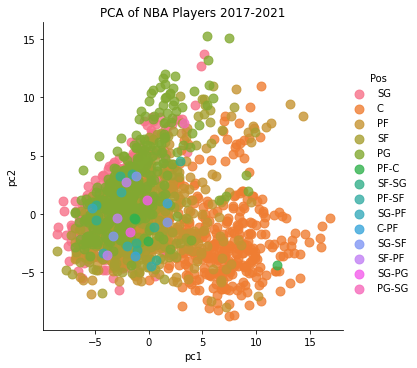

In [20]:
sns.lmplot( x="pc1", y="pc2",
  data=final, 
  fit_reg=False, 
  hue='Pos', 
  legend=True,
  scatter_kws={"s": 80}).set(title='PCA of NBA Players 2017-2021')

In [21]:
fimp1 = pd.DataFrame(data={'pc':features,'imp':pca.components_[0]}) # feature importance for first dimension

fimp2 = pd.DataFrame(data={'pc':features,'imp':pca.components_[1]}) # feature importance for second dimension

Text(0.5, 1.0, 'Important positive features for Dimension 1')

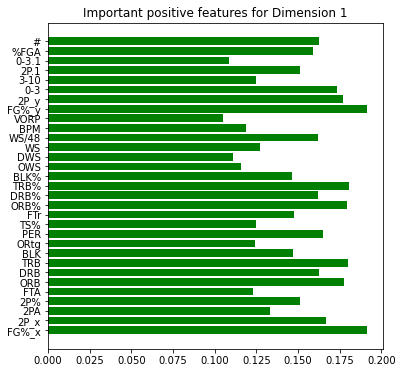

In [22]:
fimp1pos = fimp1[(fimp1.imp > .10)]
plt.figure(figsize=(6, 6))
plt.barh('pc', 'imp', color='green', data = fimp1pos)
plt.title("Important positive features for Dimension 1")

Text(0.5, 1.0, 'Important negative features for Dimension 1')

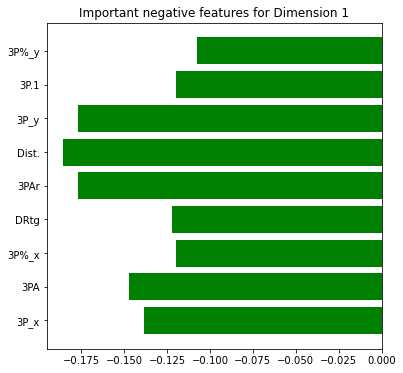

In [23]:
fimp1neg = fimp1[(fimp1.imp < -.10)]
plt.figure(figsize=(6, 6))
plt.barh('pc', 'imp', color='green', data = fimp1neg)
plt.title("Important negative features for Dimension 1")

Text(0.5, 1.0, 'Important positive features for Dimension 2')

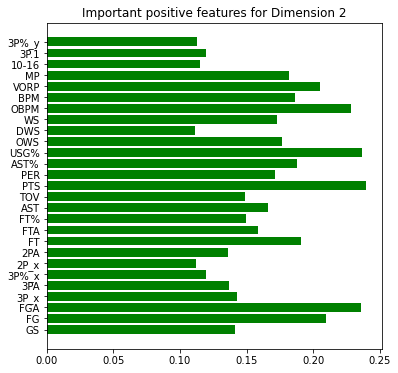

In [24]:
fimp2pos = fimp2[(fimp2.imp > .10)]
plt.figure(figsize=(6, 6))
plt.barh('pc', 'imp', color='green', data = fimp2pos)
plt.title("Important positive features for Dimension 2")

Text(0.5, 1.0, 'Important negative features for Dimension 2')

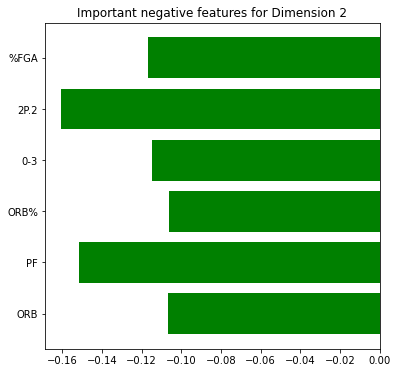

In [25]:
fimp2neg = fimp2[(fimp2.imp < -.10)]
plt.figure(figsize=(6, 6))
plt.barh('pc', 'imp', color='green', data = fimp2neg)
plt.title("Important negative features for Dimension 2")

In [26]:
pca.explained_variance_ratio_.cumsum()

array([0.30547686, 0.48758105])

In [27]:
pca2 = PCA(n_components=0.99)
pca2.fit(x)
principalComponents2 = pca2.transform(x)

principalComponents2.shape

(1761, 33)

Text(0.5, 1.0, 'bayesian information criterion (bic) method')

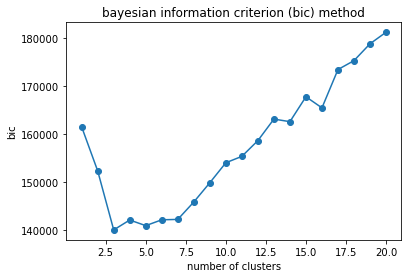

In [28]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(principalComponents2)
          for n in n_components]

plt.plot(n_components, [m.bic(principalComponents2) for m in models], label='BIC')
plt.scatter(n_components, [m.bic(principalComponents2) for m in models])
plt.xlabel('number of clusters')
plt.ylabel('bic')
plt.title('bayesian information criterion (bic) method')

In [29]:
gmm = GaussianMixture(n_components=7).fit(principalComponents)
labels = gmm.predict(principalComponents)
final['cluster'] = labels
testdf['cluster'] = labels

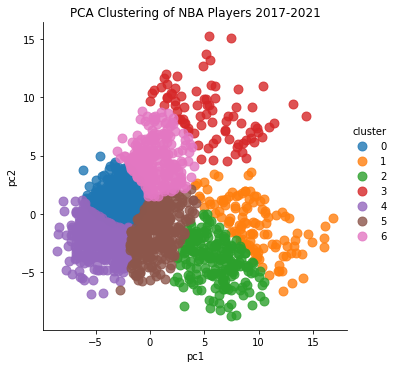

In [30]:
sns.lmplot( x="pc1", y="pc2",
  data=final, 
  fit_reg=False, 
  hue='cluster', 
  legend=True,
  scatter_kws={"s": 80}).set(title='PCA Clustering of NBA Players 2017-2021')

In [31]:
final.cluster.value_counts()

0    435
4    404
5    306
6    217
2    201
1    116
3     82
Name: cluster, dtype: int64

In [32]:
testdf.loc[testdf['cluster'] == 0]
testdf.loc[testdf['cluster'] == 0].describe()

,Age,GS,FG,FGA,FG%_x,3P_x,3PA,3P%_x,2P_x,2PA,...,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%_y,Att.,#.1,cluster
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,...,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.0
mean,26.843678,32.160920,7.780690,18.083908,0.431044,3.061609,8.212184,0.368595,4.717931,9.872414,...,0.368595,0.449232,0.830522,0.016862,9.664368,0.219260,0.406880,1.558621,0.032184,0.0
std,4.135763,25.605152,1.296395,3.002214,0.028551,1.105150,2.630049,0.040184,1.453060,3.166592,...,0.040184,0.193151,0.122621,0.017990,11.296282,0.094511,0.083477,1.822324,0.189283,0.0
min,19.000000,0.000000,4.300000,10.300000,0.359000,0.500000,1.700000,0.250000,1.200000,1.800000,...,0.250000,0.073000,0.455000,0.000000,0.000000,0.038000,0.000000,0.000000,0.000000,0.0
25%,24.000000,9.000000,6.800000,15.950000,0.412000,2.300000,6.400000,0.341000,3.700000,7.700000,...,0.341000,0.302000,0.751000,0.002000,1.000000,0.154000,0.355500,0.000000,0.000000,0.0
50%,26.000000,29.000000,7.800000,17.800000,0.429000,3.000000,8.300000,0.369000,4.800000,9.800000,...,0.369000,0.425000,0.848000,0.011000,6.000000,0.204000,0.406000,1.000000,0.000000,0.0
75%,30.000000,53.500000,8.700000,20.300000,0.450000,3.700000,9.900000,0.394000,5.650000,11.800000,...,0.394000,0.587500,0.930500,0.025500,14.000000,0.276500,0.459000,2.000000,0.000000,0.0
max,40.000000,82.000000,11.900000,26.500000,0.514000,6.200000,16.900000,0.475000,9.700000,20.000000,...,0.475000,0.948000,1.000000,0.096000,70.000000,0.757000,0.800000,10.000000,2.000000,0.0


In [33]:
testdf.loc[testdf['cluster'] == 1]
testdf.loc[testdf['cluster'] == 1].describe()

,Age,GS,FG,FGA,FG%_x,3P_x,3PA,3P%_x,2P_x,2PA,...,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%_y,Att.,#.1,cluster
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,...,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.0
mean,26.155172,45.844828,9.675862,16.552586,0.593112,0.290517,0.918103,0.178793,9.385345,15.635345,...,0.178793,0.670276,0.543491,0.221888,106.965517,0.149810,0.155733,0.870690,0.017241,1.0
std,3.859722,28.033397,1.631677,3.576018,0.057860,0.561826,1.471799,0.188406,1.593097,3.282953,...,0.188406,0.105403,0.481018,0.138944,60.728037,0.217832,0.257809,1.465725,0.130734,0.0
min,20.000000,0.000000,6.500000,9.600000,0.458000,0.000000,0.000000,0.000000,6.500000,9.600000,...,0.000000,0.344000,0.000000,0.017000,7.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,23.000000,16.250000,8.375000,13.475000,0.555750,0.000000,0.075000,0.000000,8.000000,12.800000,...,0.000000,0.599750,0.000000,0.105250,63.750000,0.000000,0.000000,0.000000,0.000000,1.0
50%,26.000000,54.500000,9.700000,16.800000,0.588500,0.000000,0.300000,0.143000,9.200000,15.500000,...,0.143000,0.692000,0.857000,0.212000,100.500000,0.066000,0.000000,0.000000,0.000000,1.0
75%,28.000000,70.000000,10.900000,19.325000,0.626750,0.225000,1.000000,0.318750,10.500000,18.200000,...,0.318750,0.743250,1.000000,0.317250,144.500000,0.208750,0.288500,1.000000,0.000000,1.0
max,37.000000,81.000000,13.900000,24.200000,0.763000,3.000000,7.800000,1.000000,13.500000,22.500000,...,1.000000,0.841000,1.000000,0.616000,306.000000,1.000000,1.000000,8.000000,1.000000,1.0


In [34]:
testdf.loc[testdf['cluster'] == 2]
testdf.loc[testdf['cluster'] == 2].describe()

,Age,GS,FG,FGA,FG%_x,3P_x,3PA,3P%_x,2P_x,2PA,...,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%_y,Att.,#.1,cluster
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.0
mean,25.800995,21.721393,7.411940,13.477114,0.555224,0.265672,0.934826,0.156119,7.145771,12.537313,...,0.156119,0.707965,0.529403,0.177179,44.751244,0.223716,0.134229,0.472637,0.014925,2.0
std,4.126766,22.049535,1.604044,3.249673,0.052483,0.473989,1.459034,0.172820,1.556983,3.047417,...,0.172820,0.085778,0.493962,0.099593,28.229733,0.279415,0.203435,0.877780,0.121557,0.0
min,19.000000,0.000000,3.100000,5.200000,0.428000,0.000000,0.000000,0.000000,3.100000,5.100000,...,0.000000,0.426000,0.000000,0.011000,2.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,22.000000,3.000000,6.200000,11.100000,0.516000,0.000000,0.000000,0.000000,6.000000,10.500000,...,0.000000,0.660000,0.000000,0.098000,24.000000,0.000000,0.000000,0.000000,0.000000,2.0
50%,26.000000,14.000000,7.400000,13.500000,0.550000,0.000000,0.300000,0.135000,7.200000,12.500000,...,0.135000,0.715000,0.938000,0.163000,39.000000,0.103000,0.000000,0.000000,0.000000,2.0
75%,28.000000,36.000000,8.600000,15.500000,0.586000,0.300000,1.200000,0.286000,8.300000,14.200000,...,0.286000,0.767000,1.000000,0.245000,62.000000,0.400000,0.261000,1.000000,0.000000,2.0
max,36.000000,82.000000,12.600000,25.300000,0.701000,2.600000,7.900000,1.000000,12.600000,25.300000,...,1.000000,0.873000,1.000000,0.534000,134.000000,1.000000,1.000000,5.000000,1.000000,2.0


In [35]:
testdf.loc[testdf['cluster'] == 3]
testdf.loc[testdf['cluster'] == 3].describe()

,Age,GS,FG,FGA,FG%_x,3P_x,3PA,3P%_x,2P_x,2PA,...,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%_y,Att.,#.1,cluster
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,...,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.0
mean,26.951220,67.926829,12.584146,25.795122,0.489695,2.803659,7.693902,0.349915,9.787805,18.104878,...,0.349915,0.361488,0.657659,0.053049,58.987805,0.100671,0.396707,2.560976,0.073171,3.0
std,3.502741,10.130970,1.357237,2.787534,0.040057,1.665069,4.055673,0.045867,2.106275,3.651108,...,0.045867,0.161549,0.244626,0.050606,57.954536,0.073386,0.124808,3.111498,0.305525,0.0
min,20.000000,43.000000,8.600000,18.900000,0.425000,0.200000,0.700000,0.238000,5.700000,10.700000,...,0.238000,0.088000,0.161000,0.000000,0.000000,0.013000,0.100000,0.000000,0.000000,3.0
25%,25.000000,61.000000,11.625000,24.425000,0.457000,1.600000,4.700000,0.318000,8.100000,15.700000,...,0.318000,0.234250,0.477750,0.013250,16.750000,0.045000,0.333000,1.000000,0.000000,3.0
50%,27.000000,68.500000,12.700000,25.800000,0.484500,2.700000,7.200000,0.358500,10.100000,17.950000,...,0.358500,0.374500,0.670500,0.042000,45.000000,0.079000,0.400000,2.000000,0.000000,3.0
75%,29.000000,75.000000,13.575000,27.375000,0.516750,3.875000,10.150000,0.378750,11.000000,20.675000,...,0.378750,0.478000,0.898250,0.079500,81.250000,0.133500,0.453500,3.000000,0.000000,3.0
max,36.000000,82.000000,16.300000,34.000000,0.611000,7.400000,17.600000,0.437000,14.800000,27.500000,...,0.437000,0.701000,1.000000,0.246000,279.000000,0.395000,1.000000,18.000000,2.000000,3.0


In [36]:
testdf.loc[testdf['cluster'] == 4]
testdf.loc[testdf['cluster'] == 4].describe()

,Age,GS,FG,FGA,FG%_x,3P_x,3PA,3P%_x,2P_x,2PA,...,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%_y,Att.,#.1,cluster
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,...,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.0
mean,26.272277,17.207921,5.653465,14.020792,0.404401,2.609406,7.465842,0.344512,3.045050,6.553960,...,0.344512,0.572421,0.914849,0.026054,7.279703,0.301757,0.372896,0.910891,0.007426,4.0
std,4.744606,19.424635,1.181668,2.940116,0.032431,1.009243,2.468787,0.048956,1.116846,2.488516,...,0.048956,0.169776,0.094019,0.026685,8.476415,0.130048,0.089845,1.175423,0.085959,0.0
min,19.000000,0.000000,2.300000,6.200000,0.309000,0.400000,2.200000,0.122000,0.500000,1.000000,...,0.122000,0.082000,0.543000,0.000000,0.000000,0.047000,0.000000,0.000000,0.000000,4.0
25%,23.000000,2.750000,4.800000,11.900000,0.383000,1.900000,5.800000,0.318000,2.300000,4.800000,...,0.318000,0.455000,0.883750,0.005000,1.000000,0.209000,0.318750,0.000000,0.000000,4.0
50%,26.000000,9.000000,5.600000,14.000000,0.405000,2.500000,7.300000,0.347500,3.000000,6.400000,...,0.347500,0.592500,0.946000,0.019000,5.000000,0.280000,0.378500,1.000000,0.000000,4.0
75%,29.000000,26.000000,6.500000,16.000000,0.424000,3.100000,8.900000,0.377000,3.800000,8.200000,...,0.377000,0.696750,0.982000,0.040000,10.000000,0.374000,0.429000,1.000000,0.000000,4.0
max,43.000000,82.000000,8.700000,24.300000,0.515000,6.100000,15.600000,0.569000,6.600000,14.800000,...,0.569000,0.943000,1.000000,0.136000,50.000000,0.849000,0.667000,8.000000,1.000000,4.0


In [37]:
testdf.loc[testdf['cluster'] == 5]
testdf.loc[testdf['cluster'] == 5].describe()

,Age,GS,FG,FGA,FG%_x,3P_x,3PA,3P%_x,2P_x,2PA,...,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%_y,Att.,#.1,cluster
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,...,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.0
mean,25.846405,28.885621,7.163399,15.288562,0.468980,1.701634,4.993791,0.329948,5.458824,10.289216,...,0.329948,0.613908,0.942807,0.079147,29.542484,0.314739,0.345359,0.898693,0.016340,5.0
std,3.943777,25.289471,1.674388,3.444973,0.034718,0.826030,2.113205,0.064176,1.711984,3.545089,...,0.064176,0.137171,0.115650,0.049634,21.119174,0.161510,0.113876,1.330425,0.126987,0.0
min,19.000000,0.000000,2.600000,7.400000,0.347000,0.000000,0.100000,0.000000,1.500000,2.500000,...,0.000000,0.207000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0
25%,23.000000,5.000000,5.900000,12.750000,0.446000,1.100000,3.500000,0.301000,4.200000,7.625000,...,0.301000,0.536250,0.937250,0.040000,14.000000,0.196250,0.288250,0.000000,0.000000,5.0
50%,25.000000,21.500000,7.000000,15.150000,0.466000,1.600000,4.900000,0.339000,5.300000,9.800000,...,0.339000,0.633000,0.974000,0.074500,25.000000,0.289000,0.351000,0.000000,0.000000,5.0
75%,29.000000,50.000000,8.200000,17.500000,0.492750,2.300000,6.500000,0.371000,6.475000,12.375000,...,0.371000,0.716000,1.000000,0.109750,43.000000,0.416500,0.416500,1.000000,0.000000,5.0
max,36.000000,82.000000,12.600000,28.100000,0.579000,4.200000,10.800000,0.474000,12.000000,25.300000,...,0.474000,0.899000,1.000000,0.255000,103.000000,0.833000,1.000000,8.000000,1.000000,5.0


In [38]:
testdf.loc[testdf['cluster'] == 6]
testdf.loc[testdf['cluster'] == 6].describe()

,Age,GS,FG,FGA,FG%_x,3P_x,3PA,3P%_x,2P_x,2PA,...,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%_y,Att.,#.1,cluster
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,...,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.0
mean,26.898618,56.612903,10.378802,22.635484,0.459018,2.900000,7.770507,0.367691,7.480645,14.859447,...,0.367691,0.372553,0.741350,0.025848,22.622120,0.162290,0.411323,1.764977,0.064516,6.0
std,3.973156,22.373252,1.585003,3.433533,0.025443,1.042877,2.511668,0.041062,1.654873,3.319864,...,0.041062,0.166193,0.170514,0.023656,21.067903,0.084439,0.088660,1.998858,0.246238,0.0
min,19.000000,0.000000,5.400000,13.400000,0.402000,0.100000,0.800000,0.156000,3.200000,6.200000,...,0.156000,0.057000,0.243000,0.000000,0.000000,0.010000,0.160000,0.000000,0.000000,6.0
25%,24.000000,51.000000,9.500000,20.300000,0.439000,2.200000,6.000000,0.347000,6.300000,12.600000,...,0.347000,0.247000,0.603000,0.007000,4.000000,0.104000,0.360000,0.000000,0.000000,6.0
50%,27.000000,61.000000,10.500000,23.000000,0.458000,2.800000,7.800000,0.368000,7.500000,14.700000,...,0.368000,0.340000,0.757000,0.021000,19.000000,0.147000,0.413000,1.000000,0.000000,6.0
75%,30.000000,72.000000,11.500000,25.100000,0.476000,3.600000,9.600000,0.397000,8.600000,17.100000,...,0.397000,0.486000,0.872000,0.040000,34.000000,0.206000,0.462000,3.000000,0.000000,6.0
max,39.000000,82.000000,14.100000,30.000000,0.542000,5.600000,16.000000,0.468000,12.400000,24.100000,...,0.468000,0.774000,1.000000,0.120000,104.000000,0.489000,0.778000,14.000000,1.000000,6.0


In [39]:
testdf.loc[testdf['Player'] == 'Dennis Schröder']

,Player,Age,Tm,GS,FG,FGA,FG%_x,3P_x,3PA,3P%_x,...,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%_y,Att.,#.1,cluster
306,Dennis Schröder,23.0,ATL,78.0,10.9,24.1,0.451,2.0,5.8,0.340,...,0.340,0.210,0.670,0.002,1.0,0.088,0.500,1.0,0.0,6
662,Dennis Schröder,24.0,ATL,67.0,11.8,26.9,0.436,1.8,6.2,0.290,...,0.290,0.193,0.566,0.002,0.0,0.053,0.214,6.0,0.0,6
1038,Dennis Schröder,25.0,OKC,14.0,9.2,22.3,0.414,2.5,7.3,0.341,...,0.341,0.165,0.798,0.001,1.0,0.135,0.388,5.0,0.0,0
1383,Dennis Schröder,26.0,OKC,2.0,11.0,23.5,0.469,3.0,7.9,0.385,...,0.385,0.357,0.840,0.003,3.0,0.105,0.529,4.0,0.0,6
1701,Dennis Schröder,27.0,LAL,61.0,8.3,18.9,0.437,1.8,5.3,0.335,...,0.335,0.318,0.887,0.005,1.0,0.142,0.167,3.0,0.0,6


In [40]:
testdf.loc[testdf['Player'] == 'Kevin Porter Jr.']

,Player,Age,Tm,GS,FG,FGA,FG%_x,3P_x,3PA,3P%_x,...,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%_y,Att.,#.1,cluster
1357,Kevin Porter Jr.,19.0,CLE,3.0,7.8,17.6,0.442,2.2,6.6,0.335,...,0.335,0.444,0.755,0.088,36.0,0.196,0.419,1.0,0.0,4


In [41]:
testdf.loc[testdf['Player'] == 'Jae\'Sean Tate']

,Player,Age,Tm,GS,FG,FGA,FG%_x,3P_x,3PA,3P%_x,...,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%_y,Att.,#.1,cluster
1713,Jae'Sean Tate,25.0,HOU,58.0,7.3,14.5,0.506,1.4,4.5,0.308,...,0.308,0.539,0.95,0.05,27.0,0.405,0.329,0.0,0.0,5


In [42]:
testdf.loc[testdf['Player'] == 'Christian Wood']

,Player,Age,Tm,GS,FG,FGA,FG%_x,3P_x,3PA,3P%_x,...,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%_y,Att.,#.1,cluster
1426,Christian Wood,24.0,DET,12.0,10.7,18.9,0.567,2.0,5.2,0.386,...,0.386,0.714,0.926,0.242,115.0,0.279,0.385,0.0,0.0,1
1755,Christian Wood,25.0,HOU,41.0,11.7,22.8,0.514,2.7,7.4,0.374,...,0.374,0.687,0.870,0.158,91.0,0.155,0.406,0.0,0.0,5


In [43]:
testdf.loc[testdf['Player'] == 'Eric Gordon']

,Player,Age,Tm,GS,FG,FGA,FG%_x,3P_x,3PA,3P%_x,...,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%_y,Att.,#.1,cluster
122,Eric Gordon,28.0,HOU,15.0,8.5,21.0,0.406,5.1,13.7,0.372,...,0.372,0.446,0.841,0.007,6.0,0.130,0.372,2.0,0.0,0
491,Eric Gordon,29.0,HOU,30.0,9.5,22.2,0.428,5.0,13.9,0.359,...,0.359,0.386,0.849,0.012,11.0,0.122,0.459,5.0,1.0,0
850,Eric Gordon,30.0,HOU,53.0,8.7,21.3,0.409,4.9,13.6,0.360,...,0.360,0.435,0.875,0.007,7.0,0.112,0.373,0.0,0.0,0


In [44]:
testdf.loc[testdf['Player'] == 'Al Horford']

,Player,Age,Tm,GS,FG,FGA,FG%_x,3P_x,3PA,3P%_x,...,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%_y,Att.,#.1,cluster
162,Al Horford,30.0,BOS,68.0,8.6,18.1,0.473,1.9,5.5,0.355,...,0.355,0.590,0.977,0.052,41.0,0.157,0.368,0.0,0.0,6
526,Al Horford,31.0,BOS,72.0,8.1,16.5,0.489,2.1,5.0,0.429,...,0.429,0.572,0.948,0.062,45.0,0.159,0.528,0.0,0.0,6
891,Al Horford,32.0,BOS,68.0,9.4,17.7,0.535,1.8,5.0,0.360,...,0.360,0.752,1.000,0.072,47.0,0.094,0.263,1.0,0.0,1
1262,Al Horford,33.0,PHI,61.0,7.6,17.0,0.450,2.4,6.8,0.350,...,0.350,0.614,0.980,0.037,24.0,0.127,0.278,0.0,0.0,5


In [45]:
testdf.loc[testdf['Player'] == 'Marcus Smart']

,Player,Age,Tm,GS,FG,FGA,FG%_x,3P_x,3PA,3P%_x,...,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%_y,Att.,#.1,cluster
313,Marcus Smart,22.0,BOS,24.0,5.6,15.5,0.359,1.9,6.9,0.283,...,0.283,0.417,0.904,0.013,9.0,0.223,0.419,9.0,0.0,0
667,Marcus Smart,23.0,BOS,11.0,5.9,15.9,0.367,2.3,7.7,0.301,...,0.301,0.333,0.760,0.012,5.0,0.145,0.278,3.0,0.0,0
1053,Marcus Smart,24.0,BOS,60.0,5.2,12.4,0.422,2.8,7.6,0.364,...,0.364,0.434,0.921,0.023,12.0,0.251,0.379,0.0,0.0,0
1392,Marcus Smart,25.0,BOS,40.0,6.4,17.2,0.375,3.4,9.9,0.347,...,0.347,0.303,0.723,0.009,5.0,0.147,0.345,5.0,0.0,0
1708,Marcus Smart,26.0,BOS,45.0,6.3,15.8,0.398,2.9,8.7,0.330,...,0.330,0.291,0.871,0.006,1.0,0.131,0.486,3.0,0.0,0


In [46]:
testdf.loc[testdf['Player'] == 'Jaylen Brown']

,Player,Age,Tm,GS,FG,FGA,FG%_x,3P_x,3PA,3P%_x,...,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%_y,Att.,#.1,cluster
47,Jaylen Brown,20.0,BOS,20.0,7.1,15.6,0.454,1.7,5.0,0.341,...,0.341,0.623,0.957,0.078,30.0,0.356,0.438,2.0,0.0,5
411,Jaylen Brown,21.0,BOS,70.0,8.7,18.6,0.465,2.8,7.1,0.395,...,0.395,0.536,0.967,0.077,54.0,0.376,0.426,2.0,0.0,5
766,Jaylen Brown,22.0,BOS,25.0,9.3,19.9,0.465,2.4,6.9,0.344,...,0.344,0.571,0.968,0.061,43.0,0.246,0.368,0.0,0.0,5
1151,Jaylen Brown,23.0,BOS,57.0,10.7,22.1,0.481,3.2,8.4,0.382,...,0.382,0.477,0.884,0.051,38.0,0.269,0.484,2.0,0.0,6
1481,Jaylen Brown,24.0,BOS,58.0,13.1,27.2,0.484,4.0,10.0,0.397,...,0.397,0.453,0.798,0.024,23.0,0.158,0.400,2.0,0.0,6


In [47]:
testdf.loc[testdf['Player'] == 'Jayson Tatum']

,Player,Age,Tm,GS,FG,FGA,FG%_x,3P_x,3PA,3P%_x,...,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%_y,Att.,#.1,cluster
675,Jayson Tatum,19.0,BOS,80.0,8.1,17.1,0.475,2.1,5.0,0.434,...,0.434,0.565,0.924,0.071,51.0,0.227,0.564,0.0,0.0,6
1061,Jayson Tatum,20.0,BOS,79.0,9.1,20.3,0.450,2.3,6.1,0.373,...,0.373,0.497,0.853,0.070,68.0,0.273,0.341,0.0,0.0,6
1396,Jayson Tatum,21.0,BOS,66.0,11.8,26.1,0.450,4.0,10.0,0.403,...,0.403,0.433,0.545,0.050,56.0,0.171,0.413,3.0,0.0,6
1714,Jayson Tatum,22.0,BOS,64.0,12.9,28.1,0.459,4.0,10.3,0.386,...,0.386,0.383,0.465,0.045,55.0,0.136,0.364,1.0,0.0,6


In [48]:
testdf.loc[testdf['Player'] == 'Robert Williams']

,Player,Age,Tm,GS,FG,FGA,FG%_x,3P_x,3PA,3P%_x,...,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%_y,Att.,#.1,cluster
1753,Robert Williams,23.0,BOS,13.0,9.2,12.8,0.721,0.0,0.1,0.0,...,0.0,0.737,0.0,0.388,93.0,0.0,0.0,2.0,0.0,1


In [49]:
testdf.loc[testdf['Player'] == 'Steven Adams']

,Player,Age,Tm,GS,FG,FGA,FG%_x,3P_x,3PA,3P%_x,...,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%_y,Att.,#.1,cluster
1,Steven Adams,23.0,OKC,80.0,7.7,13.5,0.571,0.0,0.0,0.000,...,0.000,0.668,0.0,0.198,112.0,0.000,0.0,1.0,0.0,2
366,Steven Adams,24.0,OKC,76.0,8.9,14.2,0.629,0.0,0.0,0.000,...,0.000,0.690,0.0,0.242,150.0,0.000,0.0,2.0,0.0,1
718,Steven Adams,25.0,OKC,80.0,8.4,14.1,0.595,0.0,0.0,0.000,...,0.000,0.642,0.0,0.190,131.0,0.000,0.0,2.0,0.0,1
1104,Steven Adams,26.0,OKC,63.0,8.2,13.8,0.592,0.0,0.1,0.333,...,0.333,0.670,1.0,0.176,78.0,0.333,0.0,1.0,1.0,1
1433,Steven Adams,27.0,NOP,58.0,5.6,9.2,0.614,0.0,0.1,0.000,...,0.000,0.598,0.0,0.182,51.0,0.000,0.0,3.0,0.0,2


In [50]:
testdf.loc[testdf['Player'] == 'Kyle Anderson']

,Player,Age,Tm,GS,FG,FGA,FG%_x,3P_x,3PA,3P%_x,...,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%_y,Att.,#.1,cluster
10,Kyle Anderson,23.0,SAS,14.0,4.6,10.4,0.445,0.7,2.0,0.375,...,0.375,0.577,1.000,0.019,4.0,0.725,0.414,1.0,0.0,5
372,Kyle Anderson,24.0,SAS,67.0,5.9,11.2,0.527,0.5,1.5,0.333,...,0.333,0.514,0.947,0.039,15.0,0.649,0.405,1.0,0.0,5
724,Kyle Anderson,25.0,MEM,40.0,5.8,10.7,0.543,0.3,1.3,0.265,...,0.265,0.539,1.000,0.011,2.0,0.618,0.381,0.0,0.0,5
1109,Kyle Anderson,26.0,MEM,28.0,5.5,11.6,0.474,0.8,3.0,0.282,...,0.282,0.541,1.000,0.030,10.0,0.518,0.250,2.0,0.0,5
1439,Kyle Anderson,27.0,MEM,69.0,7.8,16.7,0.468,2.4,6.6,0.360,...,0.360,0.449,0.862,0.012,7.0,0.425,0.369,1.0,0.0,6


In [51]:
testdf.loc[testdf['Player'] == 'De\'Anthony Melton']

,Player,Age,Tm,GS,FG,FGA,FG%_x,3P_x,3PA,3P%_x,...,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%_y,Att.,#.1,cluster
966,De'Anthony Melton,20.0,PHO,31.0,4.9,12.4,0.391,1.4,4.6,0.305,...,0.305,0.338,1.000,0.031,8.0,0.274,0.385,0.0,0.0,4
1317,De'Anthony Melton,21.0,MEM,8.0,6.4,16.0,0.401,1.6,5.6,0.286,...,0.286,0.529,0.875,0.055,20.0,0.164,0.391,2.0,0.0,5
1636,De'Anthony Melton,22.0,MEM,1.0,7.9,18.0,0.438,4.0,9.7,0.412,...,0.412,0.412,0.793,0.033,12.0,0.213,0.467,0.0,0.0,0


In [52]:
testdf.loc[testdf['Player'] == 'Ja Morant']

,Player,Age,Tm,GS,FG,FGA,FG%_x,3P_x,3PA,3P%_x,...,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%_y,Att.,#.1,cluster
1324,Ja Morant,20.0,MEM,67.0,10.1,21.1,0.477,1.4,4.0,0.335,...,0.335,0.282,0.550,0.067,49.0,0.101,0.50,4.0,0.0,6
1643,Ja Morant,21.0,MEM,63.0,10.0,22.3,0.449,1.7,5.6,0.303,...,0.303,0.294,0.603,0.060,46.0,0.104,0.24,1.0,0.0,6


In [53]:
testdf.loc[testdf['Player'] == 'Rudy Gay']

,Player,Age,Tm,GS,FG,FGA,FG%_x,3P_x,3PA,3P%_x,...,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%_y,Att.,#.1,cluster
484,Rudy Gay,31.0,SAS,6.0,10.4,22.0,0.471,1.5,4.8,0.314,...,0.314,0.403,0.865,0.071,32.0,0.246,0.310,6.0,0.0,5
843,Rudy Gay,32.0,SAS,51.0,10.0,19.8,0.504,2.0,4.9,0.402,...,0.402,0.394,0.892,0.058,34.0,0.315,0.483,3.0,0.0,6
1221,Rudy Gay,33.0,SAS,5.0,8.7,19.5,0.446,2.4,7.2,0.336,...,0.336,0.490,0.851,0.047,23.0,0.268,0.288,1.0,0.0,5
1536,Rudy Gay,34.0,SAS,1.0,9.4,22.4,0.420,3.8,9.9,0.381,...,0.381,0.405,0.896,0.037,19.0,0.183,0.314,2.0,0.0,0


In [54]:
testdf.loc[testdf['Player'] == 'Mike Conley']

,Player,Age,Tm,GS,FG,FGA,FG%_x,3P_x,3PA,3P%_x,...,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%_y,Att.,#.1,cluster
66,Mike Conley,29.0,MEM,68.0,10.5,22.9,0.460,3.9,9.5,0.408,...,0.408,0.266,0.561,0.001,1.0,0.115,0.438,9.0,0.0,3
794,Mike Conley,31.0,MEM,70.0,10.4,23.8,0.438,3.3,9.0,0.364,...,0.364,0.304,0.594,0.000,0.0,0.115,0.490,3.0,0.0,6
1173,Mike Conley,32.0,UTA,41.0,8.3,20.2,0.409,3.4,9.1,0.375,...,0.375,0.257,0.625,0.000,0.0,0.199,0.451,4.0,1.0,0
1501,Mike Conley,33.0,UTA,51.0,9.2,20.8,0.444,4.5,10.9,0.412,...,0.412,0.253,0.594,0.000,0.0,0.179,0.433,3.0,0.0,6


In [55]:
testdf.loc[testdf['Player'] == 'Rudy Gobert']

,Player,Age,Tm,GS,FG,FGA,FG%_x,3P_x,3PA,3P%_x,...,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%_y,Att.,#.1,cluster
120,Rudy Gobert,24.0,UTA,81.0,7.9,11.9,0.661,0.0,0.0,0.0,...,0.0,0.741,0.0,0.392,235.0,0.00,0.0,1.0,0.0,1
489,Rudy Gobert,25.0,UTA,56.0,7.6,12.3,0.622,0.0,0.0,0.0,...,0.0,0.772,0.0,0.369,151.0,0.00,0.0,0.0,0.0,1
848,Rudy Gobert,26.0,UTA,80.0,8.8,13.2,0.669,0.0,0.0,0.0,...,0.0,0.735,0.0,0.479,306.0,0.00,0.0,0.0,0.0,1
1226,Rudy Gobert,27.0,UTA,68.0,8.1,11.6,0.693,0.0,0.0,0.0,...,0.0,0.749,0.0,0.425,221.0,0.00,0.0,0.0,0.0,1
1539,Rudy Gobert,28.0,UTA,71.0,8.7,12.9,0.675,0.0,0.1,0.0,...,0.0,0.767,0.0,0.432,231.0,0.25,0.0,3.0,0.0,1


In [56]:
testdf.loc[testdf['Player'] == 'Jordan Clarkson']

,Player,Age,Tm,GS,FG,FGA,FG%_x,3P_x,3PA,3P%_x,...,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%_y,Att.,#.1,cluster
64,Jordan Clarkson,24.0,LAL,19.0,9.7,21.8,0.445,2.4,7.2,0.329,...,0.329,0.253,0.778,0.020,18.0,0.160,0.281,1.0,0.0,0
429,Jordan Clarkson,25.0,TOT,2.0,11.0,24.4,0.451,2.9,8.1,0.352,...,0.352,0.277,0.795,0.017,15.0,0.164,0.423,0.0,0.0,6
430,Jordan Clarkson,25.0,LAL,2.0,11.4,25.4,0.448,2.6,8.0,0.324,...,0.324,0.273,0.794,0.015,9.0,0.114,0.292,0.0,0.0,6
790,Jordan Clarkson,26.0,CLE,0.0,11.9,26.5,0.448,3.2,10.0,0.324,...,0.324,0.265,0.785,0.015,16.0,0.196,0.345,1.0,0.0,0
1170,Jordan Clarkson,27.0,TOT,2.0,11.2,24.7,0.454,4.3,11.8,0.368,...,0.368,0.256,0.770,0.013,10.0,0.232,0.396,1.0,0.0,6
1171,Jordan Clarkson,27.0,UTA,2.0,11.7,25.3,0.462,4.4,11.9,0.366,...,0.366,0.236,0.763,0.011,5.0,0.276,0.386,1.0,0.0,0
1498,Jordan Clarkson,28.0,UTA,1.0,12.2,28.8,0.425,5.6,16.0,0.347,...,0.347,0.165,0.630,0.013,11.0,0.172,0.301,1.0,0.0,6


In [57]:
testdf.loc[testdf['Player'] == 'Joe Ingles']

,Player,Age,Tm,GS,FG,FGA,FG%_x,3P_x,3PA,3P%_x,...,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%_y,Att.,#.1,cluster
170,Joe Ingles,29.0,UTA,26.0,5.4,12.0,0.452,3.3,7.4,0.441,...,0.441,0.370,0.821,0.009,4.0,0.355,0.424,1.0,0.0,0
533,Joe Ingles,30.0,UTA,81.0,6.5,14.0,0.467,4.0,9.0,0.440,...,0.440,0.359,0.848,0.008,6.0,0.295,0.526,1.0,0.0,0
897,Joe Ingles,31.0,UTA,82.0,6.7,14.9,0.448,3.5,9.0,0.391,...,0.391,0.388,0.825,0.004,3.0,0.261,0.444,2.0,0.0,0
1269,Joe Ingles,32.0,UTA,45.0,5.6,12.6,0.445,3.2,8.0,0.399,...,0.399,0.371,0.652,0.004,2.0,0.210,0.365,1.0,0.0,0
1577,Joe Ingles,33.0,UTA,30.0,7.2,14.7,0.489,4.8,10.6,0.451,...,0.451,0.315,0.716,0.002,1.0,0.209,0.506,1.0,0.0,0


In [58]:
testdf.loc[testdf['Player'] == 'Jrue Holiday']

,Player,Age,Tm,GS,FG,FGA,FG%_x,3P_x,3PA,3P%_x,...,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%_y,Att.,#.1,cluster
157,Jrue Holiday,26.0,NOP,61.0,9.1,20.0,0.454,2.2,6.3,0.356,...,0.356,0.230,0.480,0.020,16.0,0.132,0.378,1.0,0.0,6
521,Jrue Holiday,27.0,NOP,81.0,10.0,20.3,0.494,2.0,5.8,0.337,...,0.337,0.345,0.708,0.030,31.0,0.163,0.293,2.0,0.0,6
884,Jrue Holiday,28.0,NOP,67.0,10.6,22.4,0.472,2.3,7.0,0.325,...,0.325,0.305,0.593,0.024,25.0,0.107,0.410,1.0,0.0,6
1258,Jrue Holiday,29.0,NOP,61.0,10.0,22.0,0.455,2.7,7.6,0.353,...,0.353,0.310,0.574,0.026,22.0,0.147,0.431,2.0,0.0,6
1568,Jrue Holiday,30.0,MIL,56.0,10.2,20.3,0.503,2.7,7.0,0.392,...,0.392,0.330,0.541,0.010,6.0,0.177,0.360,2.0,0.0,6


In [59]:
testdf.loc[testdf['Player'] == 'Khris Middleton']

,Player,Age,Tm,GS,FG,FGA,FG%_x,3P_x,3PA,3P%_x,...,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%_y,Att.,#.1,cluster
596,Khris Middleton,26.0,MIL,82.0,9.9,21.3,0.466,2.4,6.8,0.359,...,0.359,0.427,0.842,0.023,27.0,0.199,0.432,1.0,0.0,6
967,Khris Middleton,27.0,MIL,77.0,9.8,22.3,0.441,3.5,9.2,0.378,...,0.378,0.327,0.603,0.017,19.0,0.127,0.317,0.0,0.0,6
1318,Khris Middleton,28.0,MIL,59.0,11.6,23.3,0.497,3.6,8.7,0.415,...,0.415,0.377,0.701,0.012,11.0,0.150,0.472,2.0,0.0,6
1637,Khris Middleton,29.0,MIL,68.0,10.6,22.2,0.476,3.1,7.6,0.414,...,0.414,0.333,0.649,0.014,11.0,0.156,0.439,0.0,0.0,6


In [60]:
testdf.loc[testdf['Player'] == 'Giannis Antetokounmpo'] 

,Player,Age,Tm,GS,FG,FGA,FG%_x,3P_x,3PA,3P%_x,...,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%_y,Att.,#.1,cluster
12,Giannis Antetokounmpo,22.0,MIL,80.0,11.7,22.5,0.521,0.9,3.2,0.272,...,0.272,0.420,0.714,0.164,194.0,0.111,0.200,4.0,0.0,3
374,Giannis Antetokounmpo,23.0,MIL,75.0,13.4,25.4,0.529,0.8,2.5,0.307,...,0.307,0.429,0.907,0.122,161.0,0.107,0.333,1.0,0.0,3
725,Giannis Antetokounmpo,24.0,MIL,72.0,14.2,24.6,0.578,1.0,4.0,0.256,...,0.256,0.472,0.673,0.246,279.0,0.044,0.222,1.0,0.0,3
1110,Giannis Antetokounmpo,25.0,MIL,63.0,16.3,29.5,0.553,2.1,7.0,0.304,...,0.304,0.438,0.551,0.170,197.0,0.034,0.500,0.0,0.0,3
1440,Giannis Antetokounmpo,26.0,MIL,61.0,14.6,25.7,0.569,1.6,5.2,0.303,...,0.303,0.428,0.299,0.169,178.0,0.045,0.300,0.0,0.0,3


In [61]:
testdf.loc[testdf['Player'] == 'Bobby Portis'] 

,Player,Age,Tm,GS,FG,FGA,FG%_x,3P_x,3PA,3P%_x,...,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%_y,Att.,#.1,cluster
278,Bobby Portis,21.0,CHI,13.0,9.2,18.9,0.488,1.6,4.8,0.333,...,0.333,0.642,1.000,0.043,16.0,0.458,0.364,1.0,0.0,5
644,Bobby Portis,22.0,CHI,4.0,11.4,24.1,0.471,2.4,6.6,0.359,...,0.359,0.540,1.000,0.031,20.0,0.112,0.360,1.0,0.0,6
1015,Bobby Portis,23.0,TOT,28.0,10.3,23.1,0.444,2.8,7.0,0.393,...,0.393,0.534,1.000,0.046,23.0,0.105,0.350,0.0,0.0,5
1359,Bobby Portis,24.0,NYK,5.0,9.3,20.6,0.450,2.3,6.5,0.358,...,0.358,0.566,0.985,0.029,15.0,0.193,0.417,0.0,0.0,5
1677,Bobby Portis,25.0,MIL,7.0,10.7,20.5,0.523,2.5,5.4,0.471,...,0.471,0.536,1.000,0.062,27.0,0.382,0.467,0.0,0.0,5


In [62]:
testdf.loc[testdf['Player'] == 'Grayson Allen'] 

,Player,Age,Tm,GS,FG,FGA,FG%_x,3P_x,3PA,3P%_x,...,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%_y,Att.,#.1,cluster
1436,Grayson Allen,25.0,MEM,38.0,6.6,15.7,0.418,4.1,10.4,0.391,...,0.391,0.606,0.907,0.029,11.0,0.172,0.34,0.0,0.0,0


In [63]:
testdf.loc[testdf['Player'] == 'Patrick Beverley'] 

,Player,Age,Tm,GS,FG,FGA,FG%_x,3P_x,3PA,3P%_x,...,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%_y,Att.,#.1,cluster
33,Patrick Beverley,28.0,HOU,67.0,5.3,12.7,0.420,2.6,6.7,0.382,...,0.382,0.297,0.836,0.004,1.0,0.323,0.387,1.0,0.0,0
749,Patrick Beverley,30.0,LAC,49.0,4.3,10.5,0.407,2.5,6.2,0.397,...,0.397,0.354,0.875,0.004,0.0,0.195,0.455,0.0,0.0,0
1132,Patrick Beverley,31.0,LAC,50.0,5.2,12.0,0.431,2.8,7.3,0.388,...,0.388,0.299,0.950,0.006,1.0,0.311,0.422,0.0,0.0,4


In [64]:
testdf.loc[testdf['Player'] == 'D\'Angelo Russell'] 

,Player,Age,Tm,GS,FG,FGA,FG%_x,3P_x,3PA,3P%_x,...,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%_y,Att.,#.1,cluster
302,D'Angelo Russell,20.0,LAL,60.0,9.4,23.3,0.405,3.6,10.3,0.352,...,0.352,0.259,0.637,0.005,4.0,0.133,0.451,3.0,0.0,0
658,D'Angelo Russell,21.0,BRK,35.0,10.9,26.4,0.414,3.5,10.9,0.324,...,0.324,0.144,0.644,0.003,2.0,0.094,0.385,0.0,0.0,0
1033,D'Angelo Russell,22.0,BRK,81.0,12.8,29.5,0.434,4.5,12.3,0.369,...,0.369,0.155,0.530,0.003,3.0,0.074,0.468,1.0,0.0,6
1379,D'Angelo Russell,23.0,TOT,45.0,11.8,27.7,0.426,5.2,14.1,0.367,...,0.367,0.243,0.538,0.004,3.0,0.081,0.429,2.0,0.0,6
1697,D'Angelo Russell,24.0,MIN,26.0,11.1,25.7,0.431,4.7,12.2,0.387,...,0.387,0.286,0.592,0.002,1.0,0.084,0.538,1.0,0.0,6


In [65]:
testdf.loc[testdf['Player'] == 'Karl-Anthony Towns'] 

,Player,Age,Tm,GS,FG,FGA,FG%_x,3P_x,3PA,3P%_x,...,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%_y,Att.,#.1,cluster
329,Karl-Anthony Towns,21.0,MIN,82.0,13.4,24.8,0.542,1.7,4.6,0.367,...,0.367,0.596,0.960,0.093,130.0,0.200,0.436,3.0,0.0,3
687,Karl-Anthony Towns,22.0,MIN,82.0,11.0,20.1,0.545,2.1,4.9,0.421,...,0.421,0.642,0.975,0.096,96.0,0.161,0.565,1.0,0.0,3
1071,Karl-Anthony Towns,23.0,MIN,77.0,12.8,24.7,0.518,2.7,6.7,0.400,...,0.400,0.584,0.930,0.086,105.0,0.115,0.415,1.0,0.0,3
1725,Karl-Anthony Towns,25.0,MIN,50.0,11.9,24.5,0.486,3.4,8.8,0.387,...,0.387,0.558,0.934,0.061,47.0,0.079,0.280,0.0,0.0,3


In [66]:
testdf.loc[testdf['Player'] == 'Jarred Vanderbilt'] 

,Player,Age,Tm,GS,FG,FGA,FG%_x,3P_x,3PA,3P%_x,...,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%_y,Att.,#.1,cluster
1732,Jarred Vanderbilt,21.0,MIN,30.0,5.9,9.8,0.606,0.0,0.2,0.2,...,0.2,0.711,1.0,0.195,40.0,0.6,0.333,0.0,0.0,2


In [67]:
testdf.loc[testdf['Player'] == 'Anthony Edwards'] 

,Player,Age,Tm,GS,FG,FGA,FG%_x,3P_x,3PA,3P%_x,...,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%_y,Att.,#.1,cluster
1520,Anthony Edwards,19.0,MIN,55.0,10.3,24.7,0.417,3.5,10.6,0.329,...,0.329,0.392,0.632,0.066,70.0,0.14,0.301,3.0,0.0,0
